In [1]:
import numpy as np
import pandas as pd 
import os
import torch
from torchvision import datasets, transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
train_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.ToTensor(),
])

train_data = datasets.ImageFolder(root='/kaggle/input/fruit-recognition/train/train', transform=train_transform)
test_data = datasets.ImageFolder(root='/kaggle/input/fruit-recognition/test', transform=test_transform)

batch_size = 256
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)

train_data.classes

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

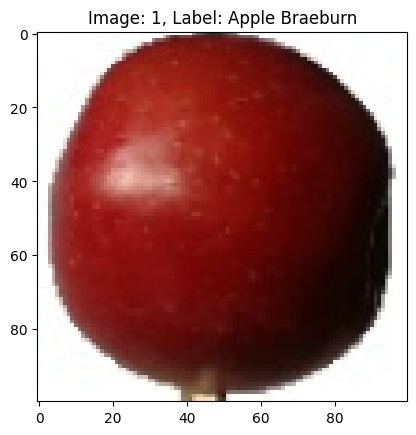

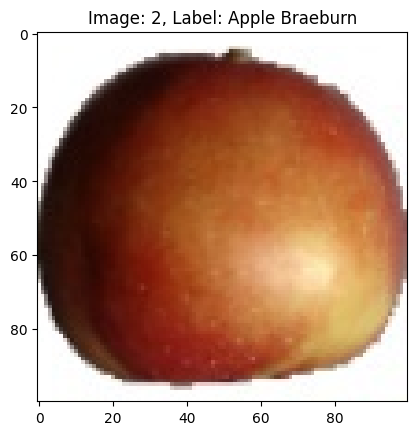

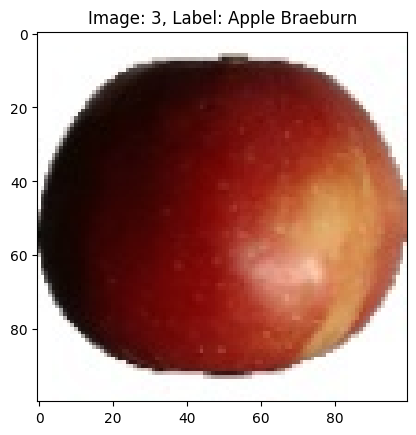

In [3]:
import matplotlib.pyplot as plt

for i in range(3):
    img, label = train_data[i]

    img = img.numpy()
    img = img.transpose((1, 2, 0))

    label_name = train_data.classes[label]

    plt.imshow(img)
    plt.title(f"Image: {i+1}, Label: {label_name}")
    plt.show()



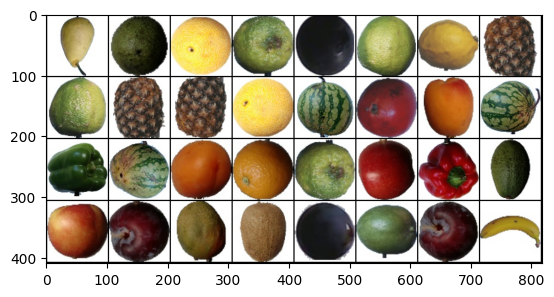

In [4]:
from torchvision.utils import make_grid

loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=32)

batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0)

plt.imshow(grid)